# Mall Customer Segmentation 

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.cluster import KMeans

In [2]:
mall = pd.read_csv('Mall_Customers.csv')

In [3]:
mall.shape

(200, 5)

In [4]:
mall.head()

CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [5]:
mall.describe()

CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000

In [6]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Transform Data

In [7]:
mall.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
#gender
mall.Gender[mall.Gender == 'Female'] = 0
mall.Gender[mall.Gender == 'Male'] = 1
mall.head()

C:\Users\bayu\AppData\Local\Temp/ipykernel_11084/19281859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall.Gender[mall.Gender == 'Female'] = 0
C:\Users\bayu\AppData\Local\Temp/ipykernel_11084/19281859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall.Gender[mall.Gender == 'Male'] = 1


CustomerID Gender  Age  Annual_Income  Spending_Score
0           1      1   19             15              39
1           2      1   21             15              81
2           3      0   20             16               6
3           4      0   23             16              77
4           5      0   31             17              40

## Selection Data 

In [9]:
df = mall[['Gender', 'Age', 'Annual_Income', 'Spending_Score']]
df.head()

Gender  Age  Annual_Income  Spending_Score
0      1   19             15              39
1      1   21             15              81
2      0   20             16               6
3      0   23             16              77
4      0   31             17              40

## K-Means Clustering Model

In [10]:
#split data
X = df.drop('Spending_Score', axis = 1)
y = df['Spending_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [11]:
kmc = KMeans()
kmc.fit(X_train, y_train)
y_pred = kmc.predict(X_test)
print(X_test)
print(y_pred)

    Gender  Age  Annual_Income
58       0   27             46
40       0   65             38
34       0   49             33
102      1   67             62
184      0   41             99
198      1   32            137
95       1   24             60
4        0   31             17
29       0   23             29
168      0   36             87
171      1   28             87
18       1   52             23
11       0   35             19
89       0   50             58
110      1   65             63
118      0   51             67
159      0   30             78
35       0   21             33
136      0   44             73
59       1   53             46
51       1   33             42
16       0   35             21
44       0   49             39
94       0   32             60
31       0   21             30
162      1   19             81
38       0   36             37
28       0   40             29
193      0   38            113
27       1   35             28
47       0   27             40
165     

In [12]:
#prediction
prediction = kmc.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(prediction)
print(accuracy)

[5 3 6 3 4 4 5 2 2 0 0 6 2 1 3 7 0 2 7 1 5 2 1 5 2 0 1 6 4 2 5 0 4 0 7 5 7
 3 5 0 3 1 4 2 1 2 5 5 4 0 1 7 7 3 2 4 4 3 4 0]
0.016666666666666666


In [13]:
#confusion matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.17      1.00      0.29         1
          10       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27   

c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1

In [14]:
model = KMeans(n_clusters = 12).fit(df)
cluster = model.cluster_centers_
print(cluster)

[[  0.77777778  27.44444444  77.33333333  10.55555556]
 [  0.38461538  27.38461538  42.07692308  54.07692308]
 [  0.45454545  32.45454545 108.18181818  82.72727273]
 [  0.34482759  46.55172414  56.37931034  47.48275862]
 [  0.4         39.          27.2         33.1       ]
 [  0.5625      48.875       80.875       17.75      ]
 [  0.4         24.85        24.95        81.        ]
 [  0.35        23.6         61.75        48.9       ]
 [  0.46428571  32.78571429  78.03571429  81.89285714]
 [  0.41666667  48.75        24.58333333   9.58333333]
 [  0.54545455  63.90909091  53.04545455  50.63636364]
 [  0.3         41.         109.7         22.        ]]


In [15]:
#print('scatterplot of gender & spending score')
plt.figure(figsize=(10,6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c= model.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(cluster[:, 0], cluster[:, 1], c='red', s=50)
plt.title("Annual Income ~ Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [16]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.Spending_Score)
plt.title("Distribution of Spending Score")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>],
       [<AxesSubplot:title={'center':'Spending_Score'}>, <AxesSubplot:>]],
      dtype=object)

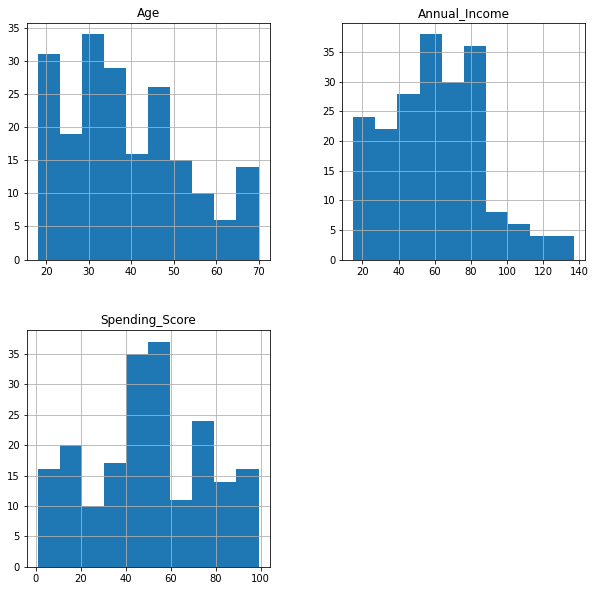

In [17]:
#histogram
df.hist(figsize=(10,10))

In [18]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='OrRd_r')

<AxesSubplot:>